# Отток клиентов фитнес-клуба

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. 

**Цель исследования** — провести анализ и подготовить план действий по удержанию клиентов.
**Задачи исследования:** 
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

**Ход исследования:**
1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных (EDA);
4. Модель прогнозирования;
5. Кластеризация пользователей; 
6. Вывод.

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#визуализация
import seaborn as sns; sns.set()


#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import itertools

Читаем файл `gym_churn.csv` и сохраняем его в переменную `gym_churn`.

In [2]:
try: 
    gym_churn = pd.read_csv('/datasets/gym_churn.csv')
except: 
    gym_churn = pd.read_csv('gym_churn.csv')

Выводим на экран первые 10 строк таблицы `gym_churn.csv`, а также общую информацию о таблице:

In [3]:
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В таблице 14 столбцов. Согласно  документации к данным:
* `Churn` — факт оттока в текущем месяце;
* `gender` — пол
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* `Phone` — наличие контактного телефона
* `Age` — возраст
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)
* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
* `Group_visits` — факт посещения групповых занятий
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

В датафрейме пропусков нет.

Необходима предобработка данных: исправление названия столбцов с учетом змеиного регистра.

## Шаг 2. Предобработка данных

### 2.1 Стиль заголовков

Изменим стиль стобцов с учетом змеиного регистра

In [5]:
gym_churn.columns = gym_churn.columns.str.lower()

In [6]:
gym_churn.columns #выводим названия столбцов датафрейма orders

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

### 2.2 Дубликаты

Для качества анализа данные необходимо проверить на дубликаты. Займемся явными дубликатами.

In [7]:
gym_churn.duplicated().sum()

0

Явных дубликатов нет, проверять наличие неявных дубликатов нет смысла, так как текстовые значения в столбцах отсутствуют. 


**Вывод**

На этапе предобработки была исправлена ошибка стиля и проверено наличие дубликатов.

Теперь можно приступить к следующему шагу.

## Шаг 3. EDA

Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения 

In [8]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


* Распределение по возрасту почти одинаково
* 85% клиентов проживают или работают в районе, где находится фитнес-центр;
* Почти половина клиентов являются сотрудниками компаний партнеров
* 30% пришли по акции "приведи друга" 
* 90% клиентов ввели контактный номер телефона
* Средняя длительность текущего действующего абонемента 4-5 месяцев
* 40% клиентов посещяют групповые занятия
* Средний возраст клиентов - 29 лет
* Cредняя суммарная выручка от других услуг фитнес-центра - 147
* Средний срок до окончания текущего действующего абонемента - 4 месяца
* Среднее время с момента первого обращения в фитнес-центр - 4 месяца
* Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
* Средняя частота посещений в неделю за предыдущий месяц - 2 раза
* Доля оттока -  2%

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
gym_churn[gym_churn['churn']==1].describe().T #отток


,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


In [10]:
gym_churn[gym_churn['churn']==0].describe().T #оставшиеся клиенты

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


Взаимосвязь признаков между оттоком и оставшимися клиентами:
* Число клиентов в оттоке больше
* Распределение по полу не отличается
* Клиенты, которые живут/работают по близости с фитнес-клубом реже уходят в отток
* В отток чаще попадают клиенты, которые являеются сотрудниками компаний партнеров и пришедшие по акции "приведи друга"
* В обеих группах клиенты оставляют контактные номера 
* Средняя длительность текущего действующего абонемента у людей в оттоке - 10 месяцев, у оставшихся - 2
* У клиентов в оттоке выше процент посещения групповых занятий
* Средний возраст клиентов не отличается
* Cредняя суммарная выручка от других услуг фитнес-центра у клиентов в оттоке больше
* Средний срок до окончания текущего действующего абонемента у оставшихся людей почти в 3 раза меньше (9 и 2 соответсвенно)
* Среднее время с момента первого обращения в фитнес-центр больше у людей в оттоке 
* Средняя частота посещений в неделю за все время с начала действия абонемента и за предыдущий месяц почти не отличается

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


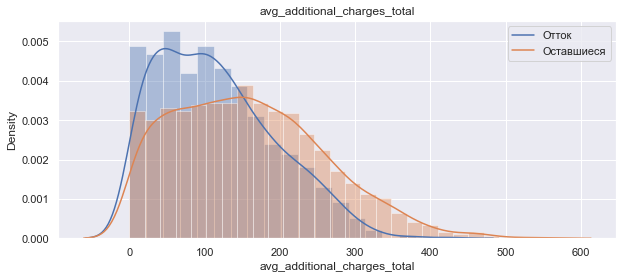

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


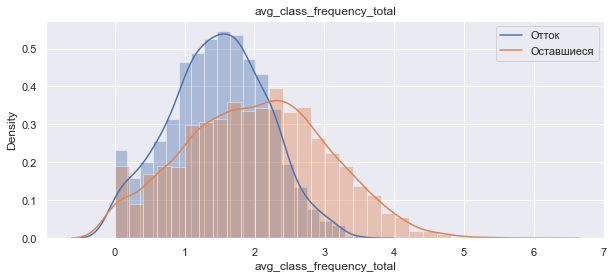

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


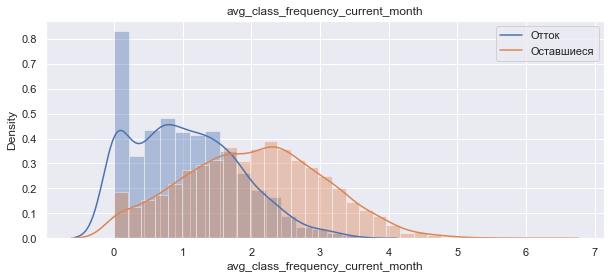

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


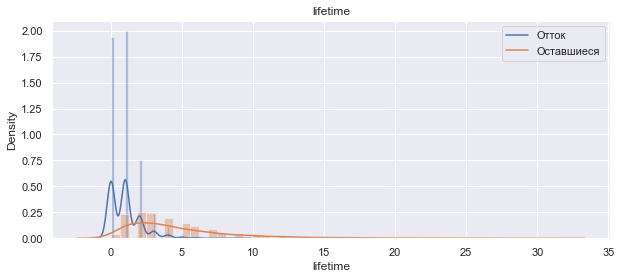

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


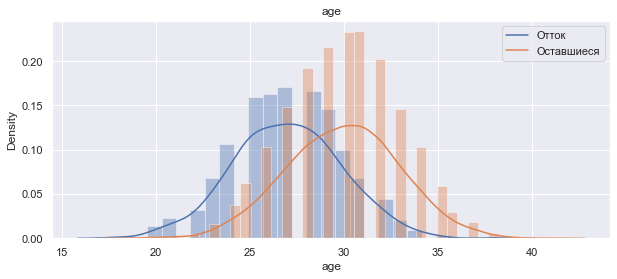

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


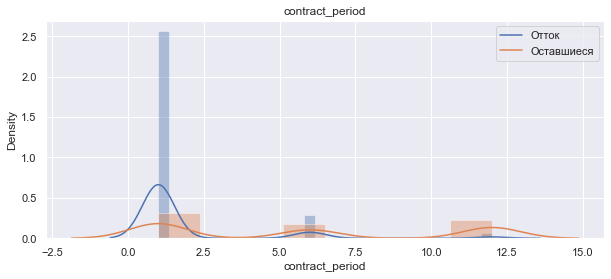

/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alina/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


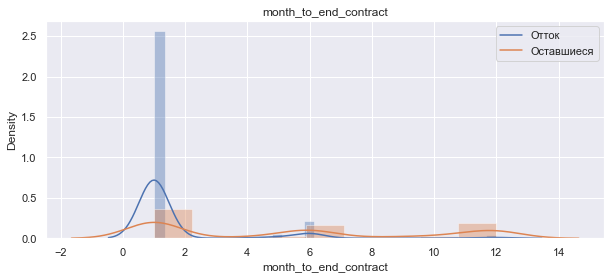

In [11]:
left = gym_churn[gym_churn['churn']==1]
stayed = gym_churn[gym_churn['churn']==0]
columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']
for column in columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

Построим матрицу корреляций и отобразим её.

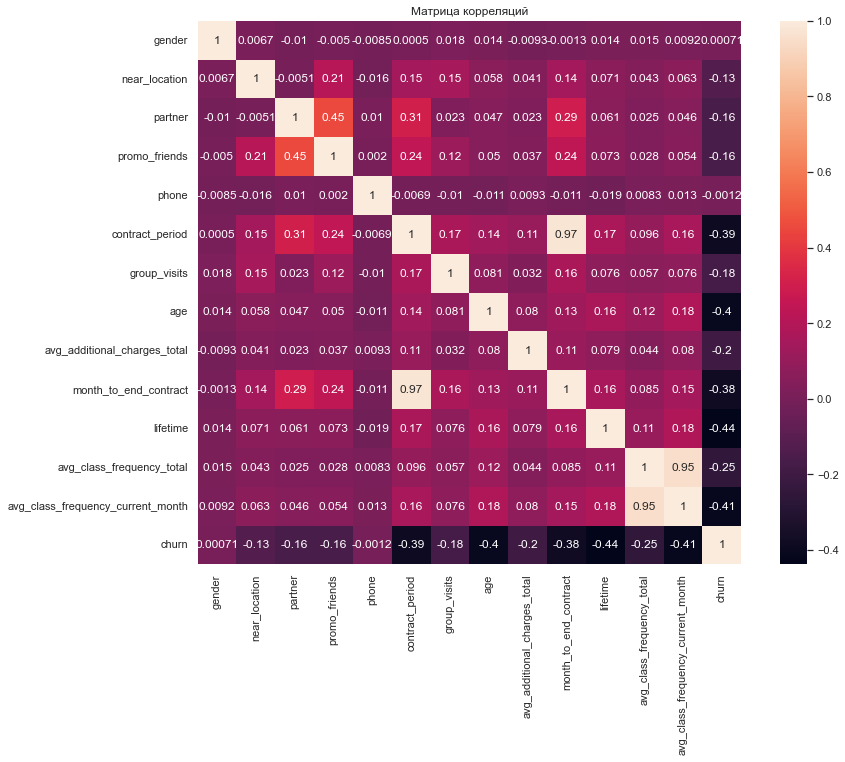

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(data = gym_churn.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

Сильной корреляции оттока с признаками не обнаружено. 
Сильно коррелируют:
* длительность текущего действующего абонемента с  срок до окончания текущего действующего абонемента 
* средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц;

## Шаг 4. Модель прогнозирования

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.

Для начала разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`.

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('churn', axis=1)
y = gym_churn['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

In [14]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

    
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)



# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)



Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83
	F1: 0.85
	ROC_AUC: 0.97


Более 80% ответов обеих моделей правильно пронозированы. Все метрики достаточно высокие. Однако модель логистической регресии показала себя чуть лучше.

## Шаг 5. Кластеризация клиентов

Проведем кластеризацию объектов (клиентов)

In [ ]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
gym_churn['cluster_km'] = labels

Явно выделены 5 кластеров. Посмотрим на средние значения признаков для каждого кластера.

In [16]:
gym_churn.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Кластер 0: близко живут/работают, самая большая длительность текущего абонемента 
Кластер 1: близко живут/работают
Кластер 2: самый маленький отток
Кластер 3: близко живут/работают, большой отток
Кластер 4: близко живут/работают, самая большая суммарная выручка от других услуг фитнес-центра, большой отток

Построим распределения признаков для кластеров.

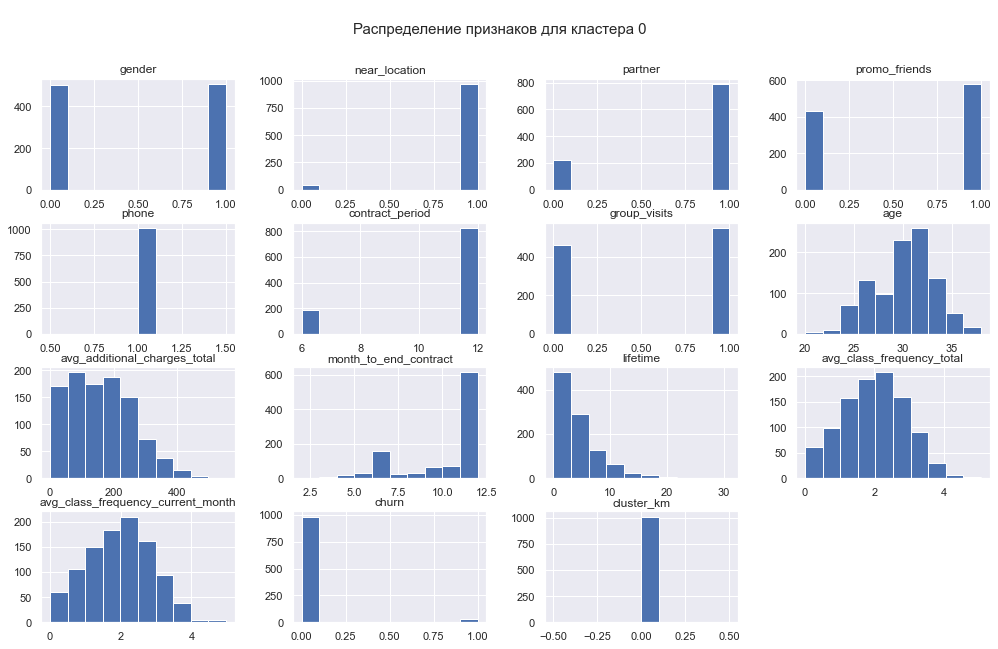

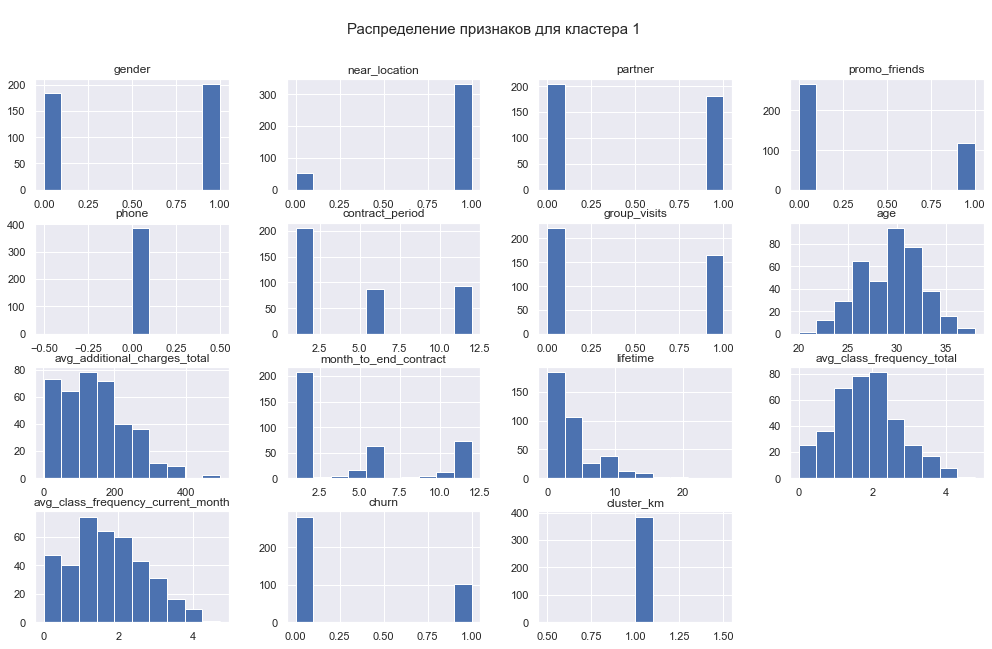

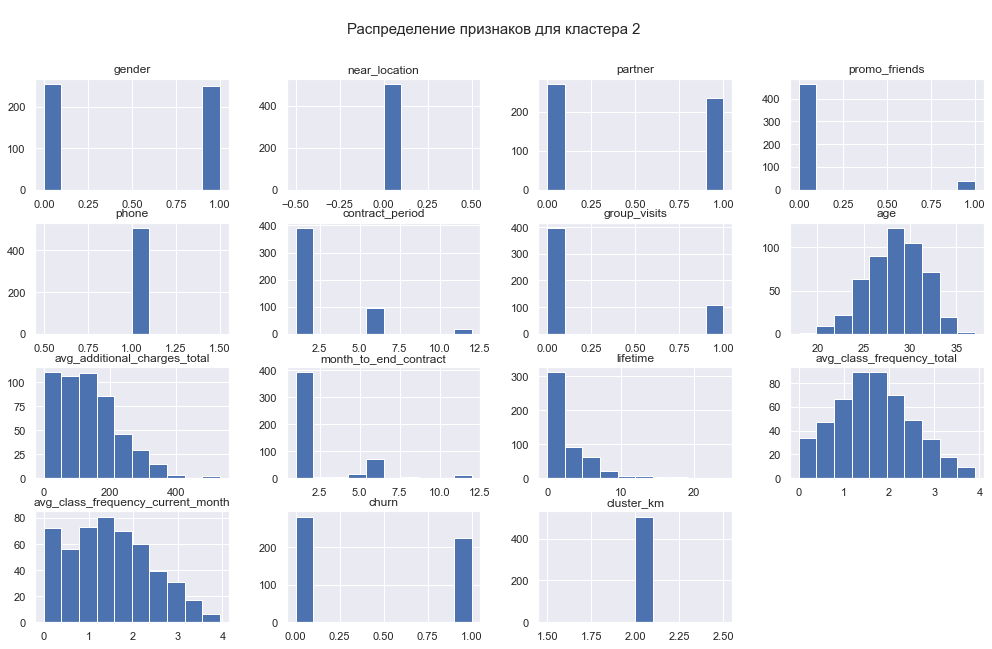

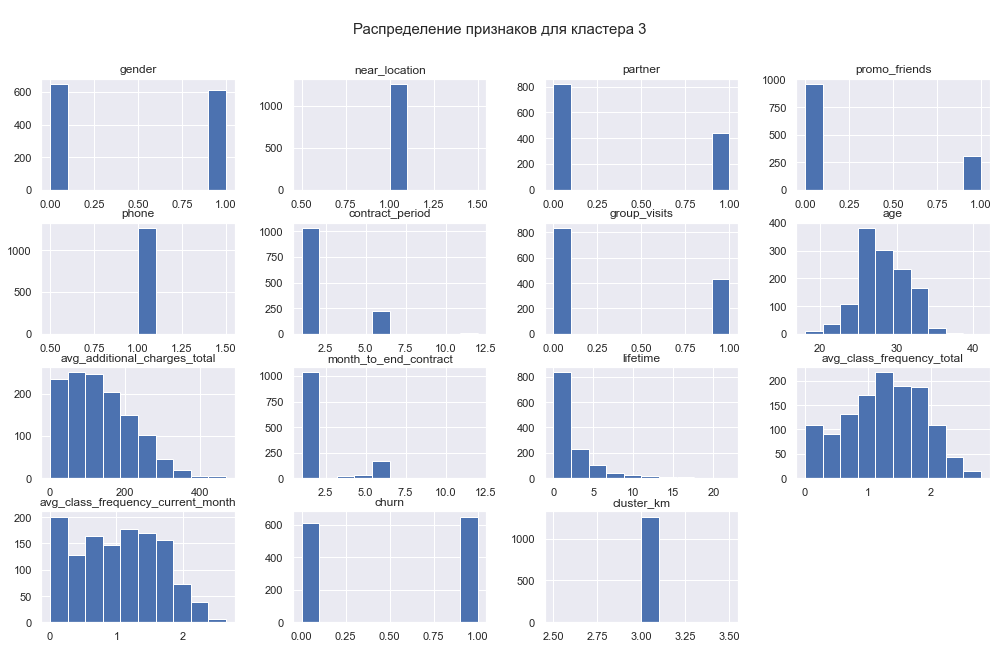

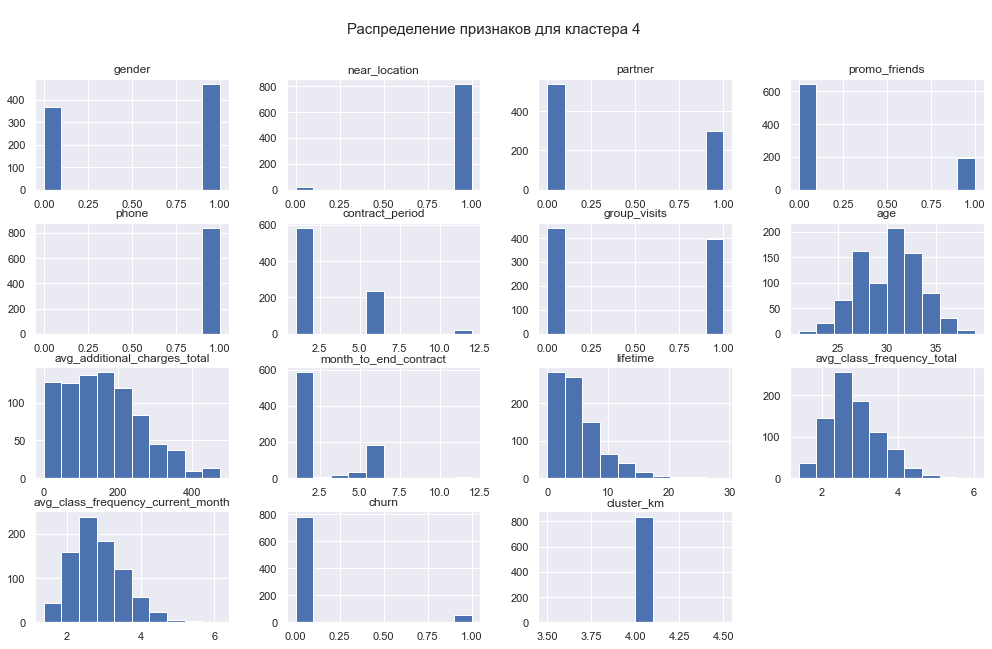

In [17]:
for value in [0, 1, 2, 3, 4]:
    gym_churn[gym_churn['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

## Вывод

Целью исследования было провести анализ и подготовить план действий по удержанию клиентов.

Работа была разделена на 6 шагов: обзор данных, предобработка данных, EDA, модель прогнозирования, кластеризация пользователей и вывод.

На этапе предобработки была исправлена ошибка стиля и проверено наличие дубликатов.

Общие признаки датасета: 
* Распределение по возрасту почти одинаково
* 85% клиентов проживают или работают в районе, где находится фитнес-центр;
* Почти половина клиентов являются сотрудниками компаний партнеров
* 30% пришли по акции "приведи друга" 
* 90% клиентов ввели контактный номер телефона
* Средняя длительность текущего действующего абонемента 4-5 месяцев
* 40% клиентов посещяют групповые занятия
* Средний возраст клиентов - 29 лет
* Cредняя суммарная выручка от других услуг фитнес-центра - 147
* Средний срок до окончания текущего действующего абонемента - 4 месяца
* Среднее время с момента первого обращения в фитнес-центр - 4 месяца
* Средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
* Средняя частота посещений в неделю за предыдущий месяц - 2 раза
* Доля оттока -  2%

Взаимосвязь признаков между оттоком и оставшимися клиентами:
* Число клиентов в оттоке больше
* Распределение по полу не отличается
* Клиенты, которые живут/работают по близости с фитнес-клубом реже уходят в отток
* В отток чаще попадают клиенты, которые являеются сотрудниками компаний партнеров и пришедшие по акции "приведи друга"
* В обеих группах клиенты оставляют контактные номера 
* Средняя длительность текущего действующего абонемента у людей в оттоке - 10 месяцев, у оставшихся - 2
* У клиентов в оттоке выше процент посещения групповых занятий
* Средний возраст клиентов не отличается
* Cредняя суммарная выручка от других услуг фитнес-центра у клиентов в оттоке больше
* Средний срок до окончания текущего действующего абонемента у оставшихся людей почти в 3 раза меньше (9 и 2 соответсвенно)
* Среднее время с момента первого обращения в фитнес-центр больше у людей в оттоке 
* Средняя частота посещений в неделю за все время с начала действия абонемента и за предыдущий месяц почти не отличается

Сильной корреляции оттока с признаками не обнаружено. 
Коррелируют:
* длительность текущего действующего абонемента с  срок до окончания текущего действующего абонемента 
* средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц;

При построении модели пронозирования было выявлено, что более 80% ответов обеих моделей правильно пронозированы. Все метрики достаточно высокие. Однако модель логистической регресии показала себя чуть лучше.

Кластризация пользователей:
* `Кластер 0`: близко живут/работают, самая большая длительность текущего абонемента 
* `Кластер 1`: близко живут/работают
* `Кластер 2`: самый маленький отток
* `Кластер 3`: близко живут/работают, большой отток
* `Кластер 4`: близко живут/работают, самая большая суммарная выручка от других услуг фитнес-центра, большой отток

